## Project Description 
The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 

#### Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

### Attribute Information
- 1 - Passenger id- Unique Id of the passenger
- 2 - Pclass- Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- 3 - Survived- Survived (0 = No; 1 = Yes)
- 4 - Name- Name of the passenger
- 5 - Sex- Sex of the passenger (Male, Female)
- 6 - Age- Age of the passenger
- 7 - Sibsp- Number of Siblings/Spouses Aboard
- 8 - Parch- Number of Parents/Children Aboard
- 9 - Ticket- Ticket Number
- 10 - Fare- Passenger Fare (British pound)
- 11 - Cabin- Cabin
- 12 - Embarked- Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\Admin\OneDrive\Desktop\Flip lobo\Assignment_25NOV23\titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Observation:
- Includes Categorical and Continuous data
- However, PassengerId and Name are unique ID's, so same can be dropped from the dataset.
- Survived Column is Target Variable

In [4]:
df.shape

(891, 12)

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Observations - Will give statistical information of numerical columns only
- Found null values in Age column
- There are some high standard deviation for some of the columns like (PassengerId, Age, and Fare). However, out of which PassengerId is unique ID, so same can be dropped. 
- Can see right skewed in following columns (Survived, Age, SibSp, Parch, and Fare). Out of which Survived is the tagert variable.
- Can see left skewed in following feature (Pclass)
- Can see some of the outliers in following columns (PassengerId, Age, SibSp, Parch, and Fare)

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
df.nunique().to_frame('No. of uniques values')

,No. of uniques values
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


## Observation:
- Following columns ('PassengerId', and 'Name') having unique IDs, hence both can be dropped.

In [10]:
df = df.drop(['PassengerId', 'Name'], axis=1)
df.shape

(891, 10)

In [11]:
categor_col = []
numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        categor_col.append(i)        
    else:
        numerical_col.append(i)
print('Categorical column = ', categor_col)
print('Numerical column = ', numerical_col)

Categorical column =  ['Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical column =  ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


## Using Encoder on categorical columns

In [12]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = oe.fit_transform(df[i].values.reshape(-1,1))
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,1.0,22.0,1,0,523.0,7.2500,NaN,2.0
1,1,1,0.0,38.0,1,0,596.0,71.2833,81.0,0.0
2,1,3,0.0,26.0,0,0,669.0,7.9250,NaN,2.0
3,1,1,0.0,35.0,1,0,49.0,53.1000,55.0,2.0
4,0,3,1.0,35.0,0,0,472.0,8.0500,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1.0,27.0,0,0,101.0,13.0000,NaN,2.0
887,1,1,0.0,19.0,0,0,14.0,30.0000,30.0,2.0
888,0,3,0.0,NaN,1,2,675.0,23.4500,NaN,2.0
889,1,1,1.0,26.0,0,0,8.0,30.0000,60.0,0.0


In [13]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

## Handling null values

In [14]:
for i in df.columns:
    df[i] = df[i].fillna(df[i].mean()) 

In [15]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [16]:
df.dtypes

Survived      int64
Pclass        int64
Sex         float64
Age         float64
SibSp         int64
Parch         int64
Ticket      float64
Fare        float64
Cabin       float64
Embarked    float64
dtype: object

In [17]:
df.shape

(891, 10)

In [18]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,338.528620,32.204208,76.000000,1.535433
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,200.850657,49.693429,20.170063,0.791197
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,158.500000,7.910400,76.000000,1.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,337.000000,14.454200,76.000000,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,519.500000,31.000000,76.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,146.000000,2.000000


## Observation:
- Found null values
- There are some high standard deviation for some of the columns like (Pclass, Age, Ticket, Fare, Cabin, and Embarked). However, out of which only Age and Fare are numerical data and rest are categorical data.
- Can see right skewed in following columns (Survived, SibSp, Parch, Ticket, and Fare). Out of which Survived is the tagert variable, Fare is continuous and rest all are categorical data.
- Can see left skewed in following feature (Pclass, Sex, and Embarked), all are categorical data
- Can see some of the outliers in following columns (Age, SibSp, Parch, Ticket, Fare, and Cabin)

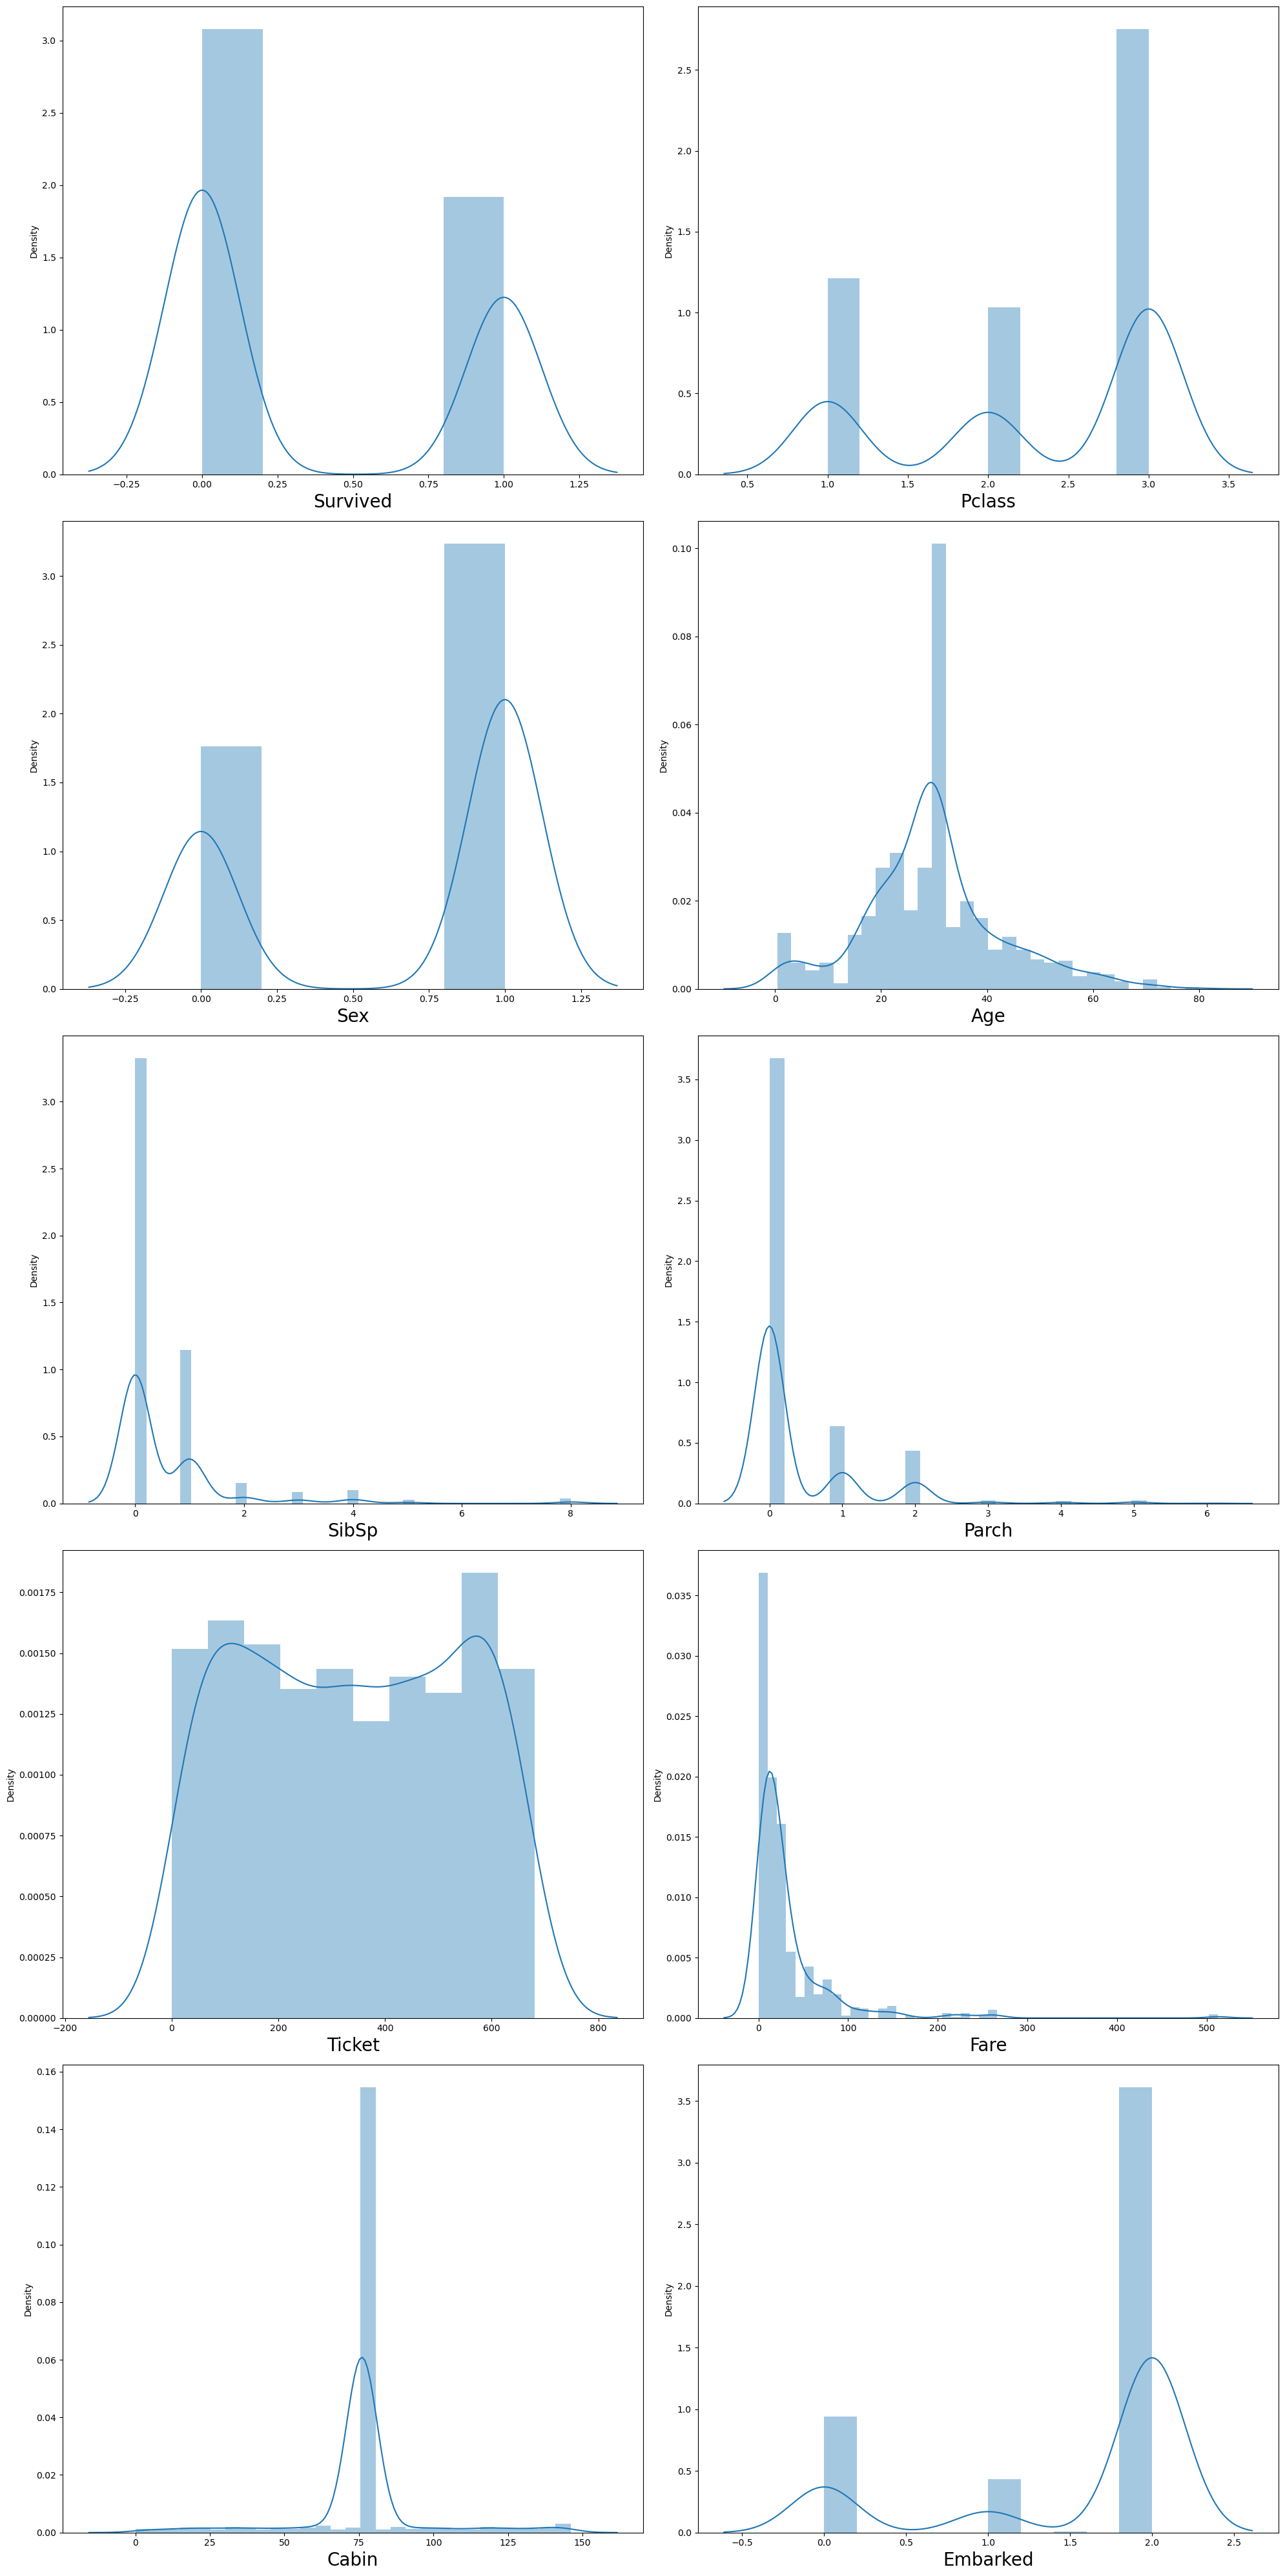

In [19]:
## Check Relationship between columns
plotnumber = 1
plt.figure(figsize = (20, 40))
for i in df.columns:
    if plotnumber <=10:
        plt.subplot(5, 2, plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i, fontsize = 20)
    plotnumber+=1 
plt.tight_layout()  

### Observations
- Right skewdness in following columns (Age, SibSp, Parch, and Fare)
- Left skewdness in following columns (Pclass, and Embarked)

In [20]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Ticket      0.000246
Fare        4.787317
Cabin       0.001155
Embarked   -1.262780
dtype: float64

## Observations:
- Right skewdness in following columns (SibSp, Parch, and Fare), only Fare is numerial column
- Left skewdness in following columns (Pclass, Sex, and Embarked), all are categorical column

In [21]:
#Handling Right Skewness
from scipy.stats import boxcox
if df['Fare'].skew() > 0.5:
        df['Fare'] = df['Fare'] + 1
        df['Fare'], _ = boxcox(df['Fare'])
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Ticket      0.000246
Fare       -0.040329
Cabin       0.001155
Embarked   -1.262780
dtype: float64

## Observations:
No skew found in numerical data

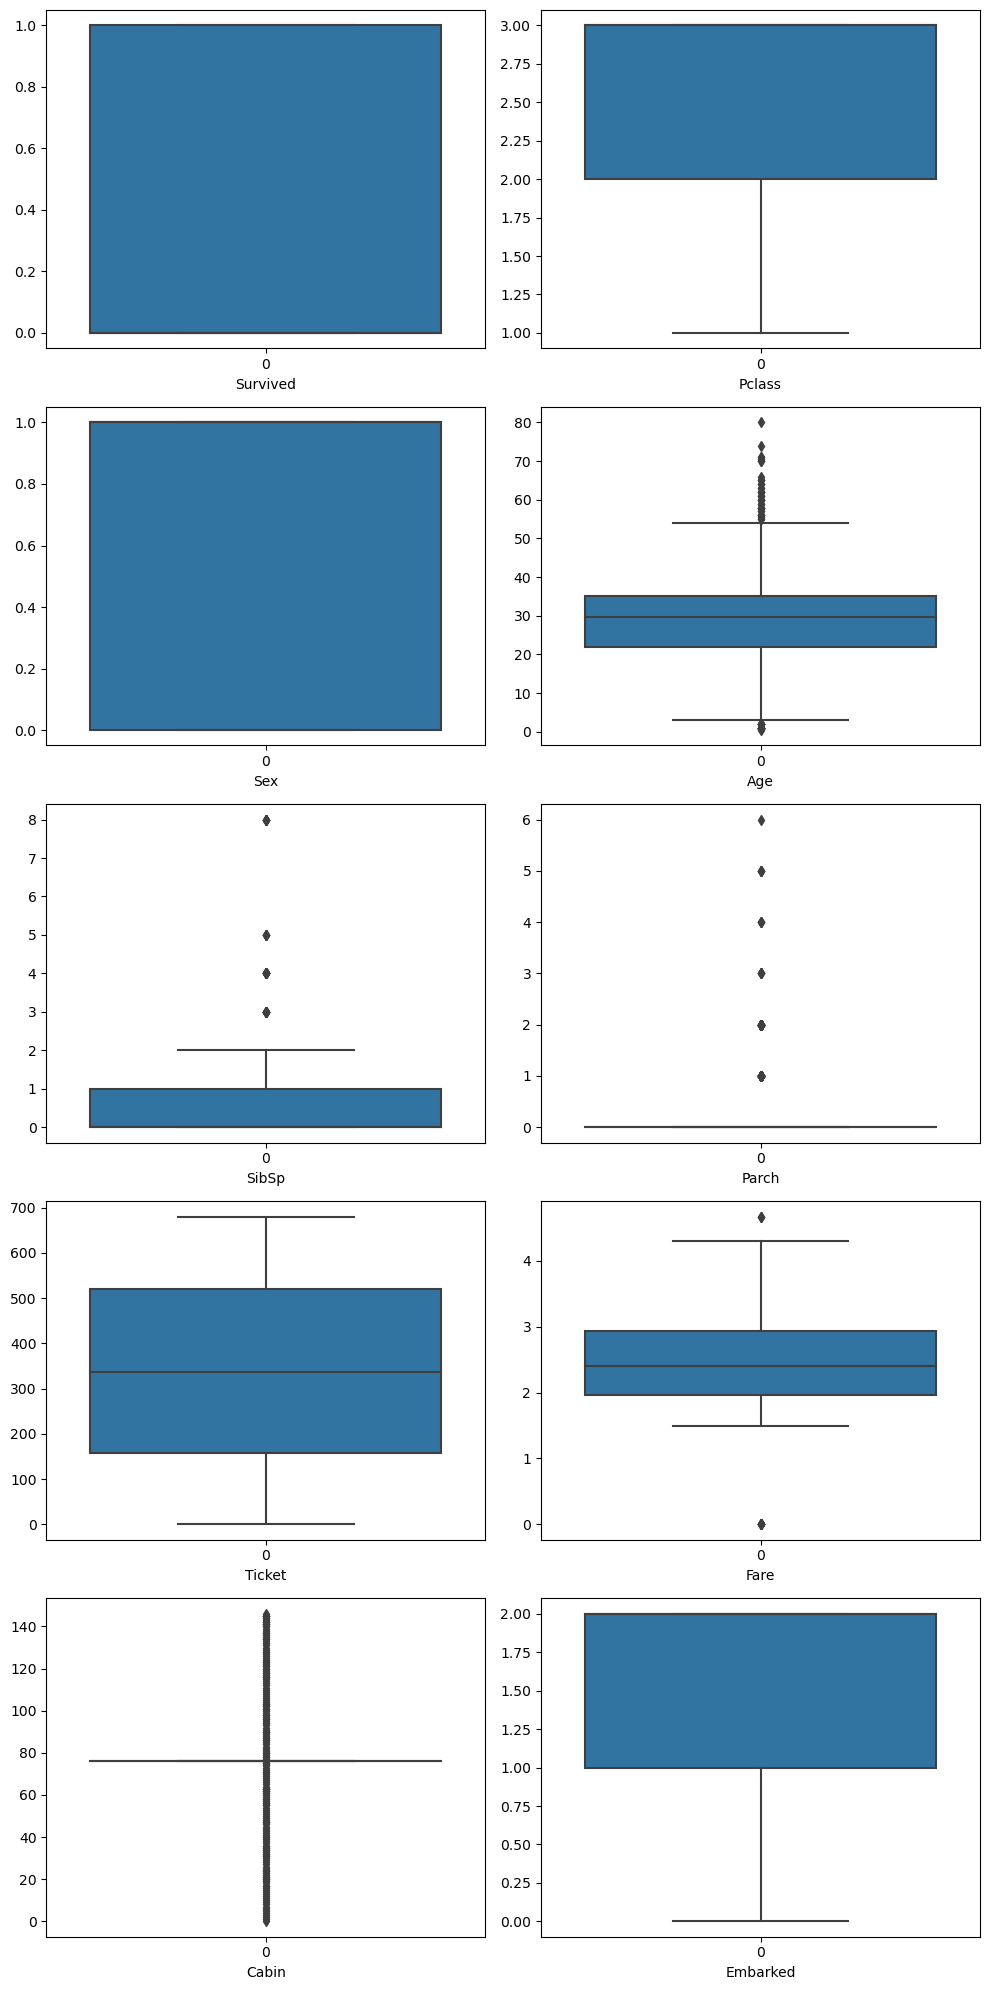

In [22]:
plt.figure(figsize = (10, 20))
number = 1
for col in df.columns:
    if number <= 10:
        plt.subplot(5, 2, number)
        sns.boxplot(data = df[col], orient = 'v')
        plt.xlabel(col)
    number+=1
plt.tight_layout() 

## Observation:
- Outliers found in following columns - Age, SibSp, Parch, Fare, and Cabin
- However, out of which only Age is continuous data and rest all our categorical data. 

In [23]:
## removing outliers with IQR
q1 = np.percentile(df['Age'], 25)
q3 = np.percentile(df['Age'], 75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
high_bound = q3 + (1.5 * iqr)
outliers = (df['Age'] < lower_bound) | (df['Age'] > high_bound)
df1 = df[~outliers]

old_data = df.shape[0]
new_data = df1.shape[0]
loss_data = ((old_data - new_data) / old_data) * 100
print('Old data =', old_data)
print('New data = ', new_data)
print('Loss data in percentage = ', loss_data)
    

Old data = 891
New data =  825
Loss data in percentage =  7.4074074074074066


In [24]:
## removing outliers with z score
from scipy.stats import zscore
z = np.abs(zscore(df['Age']))
outliers = np.where(z>3)
df2 = df[(z<3)]
old_data = df.shape[0]
new_data = df2.shape[0]
loss_data = ((old_data - new_data) / old_data) * 100
print('Old data =', old_data)
print('New data = ', new_data)
print('Loss data in percentage = ', loss_data)

Old data = 891
New data =  884
Loss data in percentage =  0.7856341189674524


### Observations
- Out of both methods, will go further with z score, due to having less data loss compare to IQR score

In [25]:
df = df2
df.shape

(884, 10)

### Check Multicollinearity betweeen all columns

In [26]:
cor = df.corr()
cor

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,1.000000,-0.342511,-0.543261,-0.061145,-0.036518,0.081209,-0.159663,0.328868,0.013707,-0.174176
Pclass,-0.342511,1.000000,0.137226,-0.329012,0.082608,0.018100,0.330118,-0.636617,0.134622,0.161658
Sex,-0.543261,0.137226,1.000000,0.068107,-0.112957,-0.244551,0.055320,-0.266785,-0.027707,0.112774
Age,-0.061145,-0.329012,0.068107,1.000000,-0.233936,-0.179291,-0.091604,0.095921,-0.041384,-0.022508
SibSp,-0.036518,0.082608,-0.112957,-0.233936,1.000000,0.413754,0.081020,0.322220,0.016026,0.067515
Parch,0.081209,0.018100,-0.244551,-0.179291,0.413754,1.000000,0.020587,0.333079,0.003010,0.038685
Ticket,-0.159663,0.330118,0.055320,-0.091604,0.081020,0.020587,1.000000,-0.114203,0.075729,0.005247
Fare,0.328868,-0.636617,-0.266785,0.095921,0.322220,0.333079,-0.114203,1.000000,-0.092803,-0.196346
Cabin,0.013707,0.134622,-0.027707,-0.041384,0.016026,0.003010,0.075729,-0.092803,1.000000,0.128366
Embarked,-0.174176,0.161658,0.112774,-0.022508,0.067515,0.038685,0.005247,-0.196346,0.128366,1.000000


<AxesSubplot:>

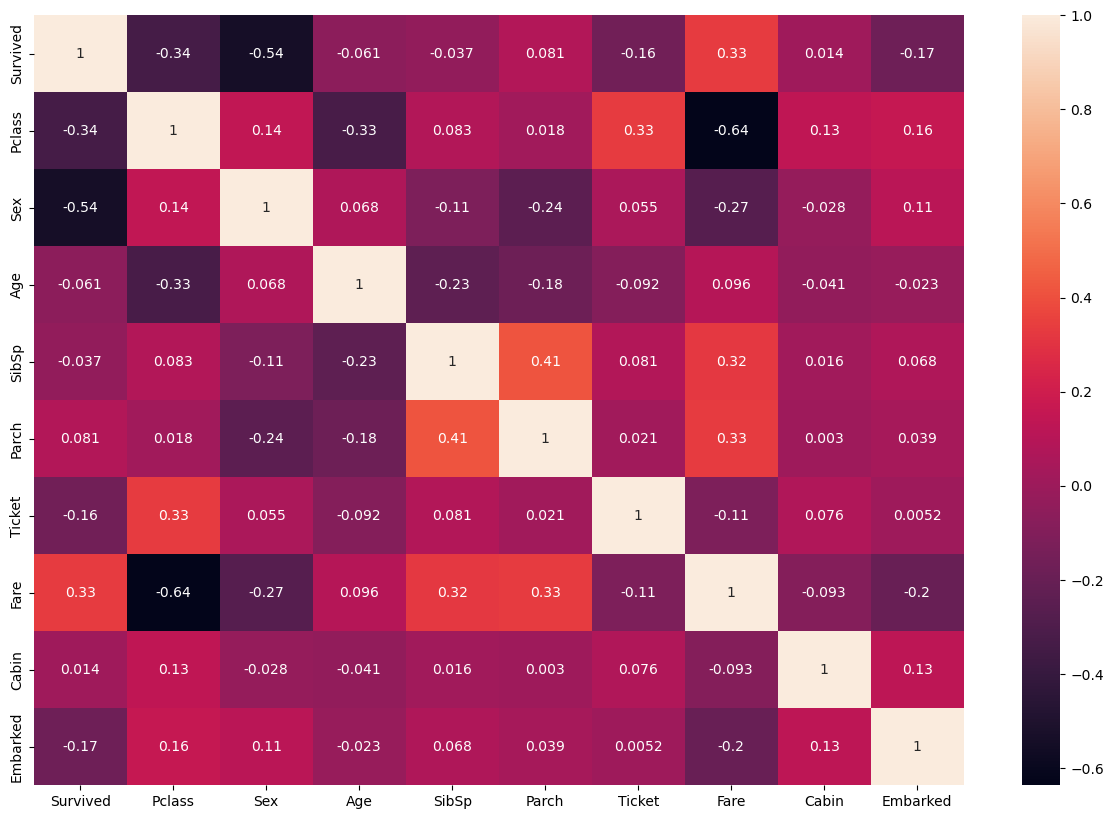

In [27]:
plt.figure(figsize = (15, 10))
sns.heatmap(cor, annot=True)

### Observations:
- Following features (Fare) having postive correlation with label (Survived), not that strong correlation.
- Following features (Sex, and Pclass) having negative correlation with label (Survived), however, both are categorical data.
- Also, noticed multicolinearity between features (Pclass vs Fare - -ve coorelation) 

In [28]:
x = df.drop(['Survived'], axis=1)
y = df.Survived

In [29]:
x

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,1.0,22.000000,1,0,523.0,1.906724,76.0,2.0
1,1,0.0,38.000000,1,0,596.0,3.497640,81.0,0.0
2,3,0.0,26.000000,0,0,669.0,1.970459,76.0,2.0
3,1,0.0,35.000000,1,0,49.0,3.304258,55.0,2.0
4,3,1.0,35.000000,0,0,472.0,1.981680,76.0,2.0
...,...,...,...,...,...,...,...,...,...
886,2,1.0,27.000000,0,0,101.0,2.326029,76.0,2.0
887,1,0.0,19.000000,0,0,14.0,2.916885,30.0,2.0
888,3,0.0,29.699118,1,2,675.0,2.745246,76.0,2.0
889,1,1.0,26.000000,0,0,8.0,2.916885,60.0,0.0


### Features Scaling and using Standard Scalrization

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x1 = pd.DataFrame(x_scaled, columns = x.columns)
x1

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.823772,0.742211,-0.590161,0.428741,-0.474664,0.925649,-0.876286,-0.010862,0.585790
1,-1.575616,-1.347326,0.692566,0.428741,-0.474664,1.289575,1.336782,0.240504,-1.946864
2,0.823772,-1.347326,-0.269479,-0.475811,-0.474664,1.653501,-0.787627,-0.010862,0.585790
3,-1.575616,-1.347326,0.452055,0.428741,-0.474664,-1.437374,1.067776,-1.066602,0.585790
4,0.823772,0.742211,0.452055,-0.475811,-0.474664,0.671400,-0.772018,-0.010862,0.585790
...,...,...,...,...,...,...,...,...,...
879,-0.375922,0.742211,-0.189309,-0.475811,-0.474664,-1.178139,-0.293006,-0.010862,0.585790
880,-1.575616,-1.347326,-0.830672,-0.475811,-0.474664,-1.611859,0.528915,-2.323435,0.585790
881,0.823772,-1.347326,0.027081,0.428741,2.000869,1.683412,0.290153,-0.010862,0.585790
882,-1.575616,0.742211,-0.269479,-0.475811,-0.474664,-1.641770,0.528915,-0.815235,-1.946864


In [31]:
x = x1

In [32]:
## Checking Multicollinearity with VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF_func = variance_inflation_factor
vif = pd.DataFrame()
vif['Vif'] = [VIF_func(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['Features'] = x.columns
vif

,Vif,Features
0,2.476662,Pclass
1,1.129038,Sex
2,1.201612,Age
3,1.458985,SibSp
4,1.393894,Parch
5,1.151082,Ticket
6,2.606559,Fare
7,1.036297,Cabin
8,1.091278,Embarked


### Observation:
- Confirmed no strong correlation between features

In [33]:
y.value_counts()

0    543
1    341
Name: Survived, dtype: int64

### Observation:
- Can see data set imbalance with try to resolve by SMOTE

In [34]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x1, y1 = sm.fit_resample(x, y)

In [35]:
y1.value_counts()

0    543
1    543
Name: Survived, dtype: int64

### Modelling

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [37]:
### Creating train test split
x_train,x_test,y_train,y_test = train_test_split(x1, y1, test_size = 0.25, random_state = 300)

In [38]:
### Classsification Models
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, auc
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [39]:
RFC = RandomForestClassifier()
ETC = ExtraTreesClassifier()
GBC = GradientBoostingClassifier()
ABC = AdaBoostClassifier()
BC = BaggingClassifier()
LR = LogisticRegression()
svc = SVC()
DTC = DecisionTreeClassifier()
KNN = KNeighborsClassifier()

In [40]:
def metric_score(model, x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred = model.predict(x_train)
        
        print(f"Model Name: {model_name}")
        print("\n---------------Train Result---------------")
        print(f"Accuracy Score: {accuracy_score(y_train, y_pred) * 100:.2f}%")
    elif train==False:
        pred = model.predict(x_test)
        
        print("\n---------------Test Result---------------")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        
        print('\n \n Test Classification Report \n', classification_report(y_test, pred, digits=2))
        

In [41]:
models = [('RFC', RFC), ('ETC', ETC), ('GBC', ABC), ('BC', BC), ('LR', LR), ('svc', svc), ('DTC', DTC), ('KNN', KNN)]
for model_name, model in models:
    model.fit(x_train, y_train)    

In [42]:
for model_name, model in models:
    metric_score(model, x_train,x_test,y_train,y_test, train=True)
    metric_score(model, x_train,x_test,y_train,y_test, train=False)

Model Name: RFC

---------------Train Result---------------
Accuracy Score: 99.88%

---------------Test Result---------------
Accuracy Score: 86.40%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.85      0.88       154
           1       0.82      0.88      0.85       118

    accuracy                           0.86       272
   macro avg       0.86      0.87      0.86       272
weighted avg       0.87      0.86      0.86       272

Model Name: ETC

---------------Train Result---------------
Accuracy Score: 99.88%

---------------Test Result---------------
Accuracy Score: 83.46%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.82      0.85       154
           1       0.79      0.85      0.82       118

    accuracy                           0.83       272
   macro avg       0.83      0.84      0.83       272
weighted avg       0.84      0.83    

### Cross Validation to check whether selected models are over fitting

In [43]:
from sklearn.model_selection import cross_val_score

In [44]:
for model_name, model in models:
    score = cross_val_score(model, x1, y1, cv=5)
    print(f"Model Name: {model_name}")
    print('Accuracy Score = ',accuracy_score(y_test, model.predict(x_test)) * 100)
    print('Cross validation score = ', score.mean()* 100)
    print('Difference between Accuracy and Cross Validation Score = ', accuracy_score(y_test, model.predict(x_test)) - score.mean())
    print('\n')

Model Name: RFC
Accuracy Score =  86.39705882352942
Cross validation score =  84.44256542510465
Difference between Accuracy and Cross Validation Score =  0.019544933984247725


Model Name: ETC
Accuracy Score =  83.45588235294117
Cross validation score =  83.6143406756014
Difference between Accuracy and Cross Validation Score =  -0.0015845832266021542


Model Name: GBC
Accuracy Score =  78.67647058823529
Cross validation score =  80.94364351245085
Difference between Accuracy and Cross Validation Score =  -0.022671729242155547


Model Name: BC
Accuracy Score =  82.72058823529412
Cross validation score =  84.71990867966008
Difference between Accuracy and Cross Validation Score =  -0.019993204443659707


Model Name: LR
Accuracy Score =  79.77941176470588
Cross validation score =  78.72997082822474
Difference between Accuracy and Cross Validation Score =  0.010494409364811497


Model Name: svc
Accuracy Score =  82.35294117647058
Cross validation score =  82.69225891007483
Difference between

### Conclusion:
- KNN is the best model, as difference between accuracy score and cross validation score is least compares to others model.

### Hyper parameter tuning for KNN Model

In [45]:
## KNN
from sklearn.model_selection import GridSearchCV

In [46]:
param_grid = { 'n_neighbors': range(20),
               'weights': ['uniform', 'distance'],
               'metric': ['euclidean', 'manhattan']              
             }

In [48]:
gridsearch = GridSearchCV(KNN, param_grid, cv=5, scoring='accuracy')
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': range(0, 20),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [49]:
gridsearch.best_score_

0.834128607134742

In [50]:
gridsearch.best_params_

{'metric': 'manhattan', 'n_neighbors': 12, 'weights': 'distance'}

In [57]:
Final_model = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 12, weights = 'distance')
Final_model.fit(x_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=12, weights='distance')

In [58]:
y_pred = Final_model.predict(x_train)
print("\n---------------Train Result---------------")
print(f"Accuracy Score: {accuracy_score(y_train, y_pred) * 100:.2f}%")
pred = Final_model.predict(x_test)
print("\n---------------Test Result---------------")
print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
print('\n \n Test Classification Report \n', classification_report(y_test, pred, digits=2))


---------------Train Result---------------
Accuracy Score: 99.88%

---------------Test Result---------------
Accuracy Score: 83.09%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.81      0.84       154
           1       0.78      0.86      0.81       118

    accuracy                           0.83       272
   macro avg       0.83      0.83      0.83       272
weighted avg       0.84      0.83      0.83       272



## Plotting ROC and compare AUC for Final_model

In [59]:
fpr, tpr, thresholds = roc_curve(y_test, pred)

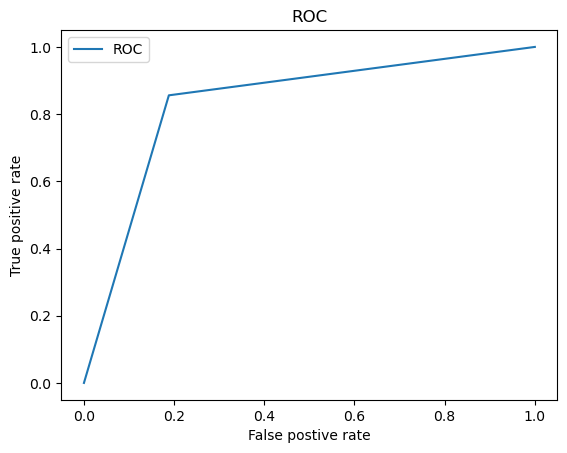

In [61]:
plt.plot(fpr, tpr, label = 'ROC')
plt.xlabel('False postive rate')
plt.ylabel('True positive rate')
plt.title('ROC')
plt.legend()
plt.show()

In [62]:
## AUC score
roc_auc = auc(fpr, tpr)
roc_auc

0.833810257539071

### Saving the final model

In [63]:
import pickle

In [64]:
pickle.dump(Final_model, open('Titanic survived Project','wb'))

In [65]:
## Do the predication
loaded_model = pickle.load(open('Titanic survived Project','rb'))
predicted = loaded_model.predict(x_test)
original = np.array(y_test)
df = pd.DataFrame()
df['Predicted'] = predicted
df['Original'] = original
df

,Predicted,Original
0,0,1
1,1,0
2,0,0
3,1,1
4,1,0
...,...,...
267,1,0
268,1,1
269,0,0
270,0,0


In [66]:
print(f"Accuracy Score: {accuracy_score(y_test, predicted) * 100:.2f}%")

Accuracy Score: 83.09%
